In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

from utils import *

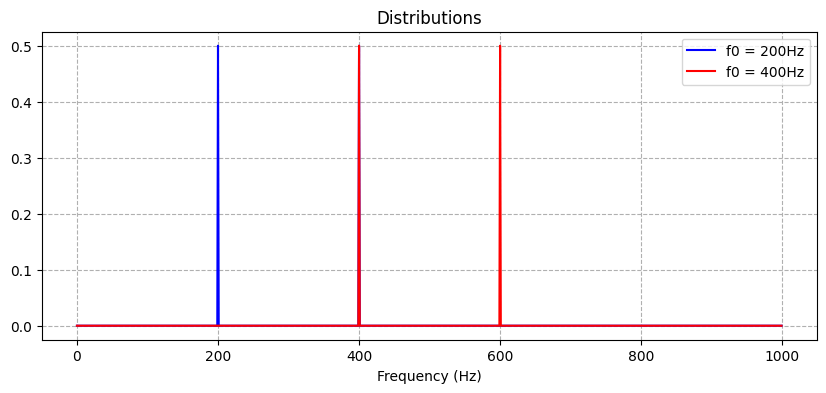

In [2]:
# Define dirac distributions

dirac_size = 1000

dirac_f1 = dirac_size * 0.2
dirac_f2 = dirac_size * 0.4

dirac_1 = dirac_distribution([200, 400], [1, 1])
dirac_2 = dirac_distribution([400, 600], [1, 1])

frequency = np.arange(dirac_size, dtype=np.float64)

plt.figure(figsize=[10, 4])

# Use line plots for a cleaner look
plt.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)

plt.xlabel('Frequency (Hz)')
plt.title('Distributions')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.show()

## Optimal transport

In [3]:
def _emd_optimal_transport(frequency, source, target, alpha=0.5, index_method='int', return_cost=False, metric='sqeuclidean', p=1): # can i get rid of frequency?

    emd_plan = ot.emd_1d(frequency, frequency, source, target, metric=metric, p=p)
    emd_plan[np.isnan(emd_plan)] = 0
    emd_plan = csr_matrix(emd_plan)
    emd_interpolation = np.zeros(len(frequency))
    row, col = emd_plan.nonzero()
    for i, j in zip(row, col):
        index = get_frequency(i, j, alpha=alpha, method=index_method)
        emd_interpolation[index] += emd_plan[i, j]
    
    if return_cost:
        return emd_interpolation, emd_plan
        
    return emd_interpolation

In [11]:
# Optimal transport

alpha = 0.5

# EMD 

dirac_emd_interpolation, dirac_emd_cost_matrix = _emd_optimal_transport(frequency, dirac_1, dirac_2, alpha=alpha, return_cost=True, metric='cosine', p=1)

plt.figure(figsize=[10, 8])  # Increase figure size to accommodate both subplots

# Second subplot for A, C, and EMD interpolation
plt.subplot(3, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
plt.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
plt.plot(frequency, dirac_emd_interpolation, label='EMD', color="purple")
plt.xlabel('Frequency (Hz)')
plt.title(f'Interpolation between two dirac distributions - EMD - alpha={alpha}')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.tight_layout()  # Adjust the layout so the plots are neatly arranged
plt.show()

AttributeError: 'float' object has no attribute 'reshape'

## Animations

MovieWriter ffmpeg unavailable; using Pillow instead.


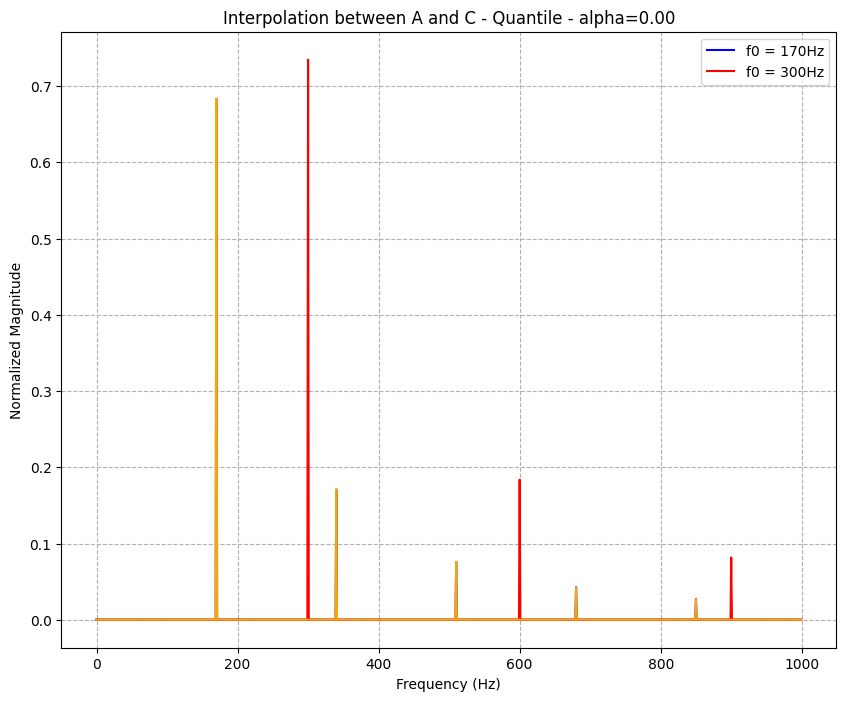

In [5]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two dirac distributions - Quantile - alpha={alpha}')
ax.grid(True, which="both", ls="--")
ax.legend()

# Placeholder for the quantile interpolation plot, initially not visible
quantile_line, = ax.plot([], [], label='Quantile', color="orange")

def update(frame):
    # Calculate new alpha for this frame
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    # Recalculate quantile interpolation with the new alpha
    dirac_quantile_interpolation = quantile_optimal_transport(dirac_1, dirac_2, alpha=alpha)
    
    # Update the data for the quantile interpolation plot
    quantile_line.set_data(frequency, dirac_quantile_interpolation)
    
    # Update the title to reflect the current alpha
    ax.set_title(f'Interpolation between A and C - Quantile - alpha={alpha:.2f}')
    
    return quantile_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save('animations/diracs/quantile_interpolation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


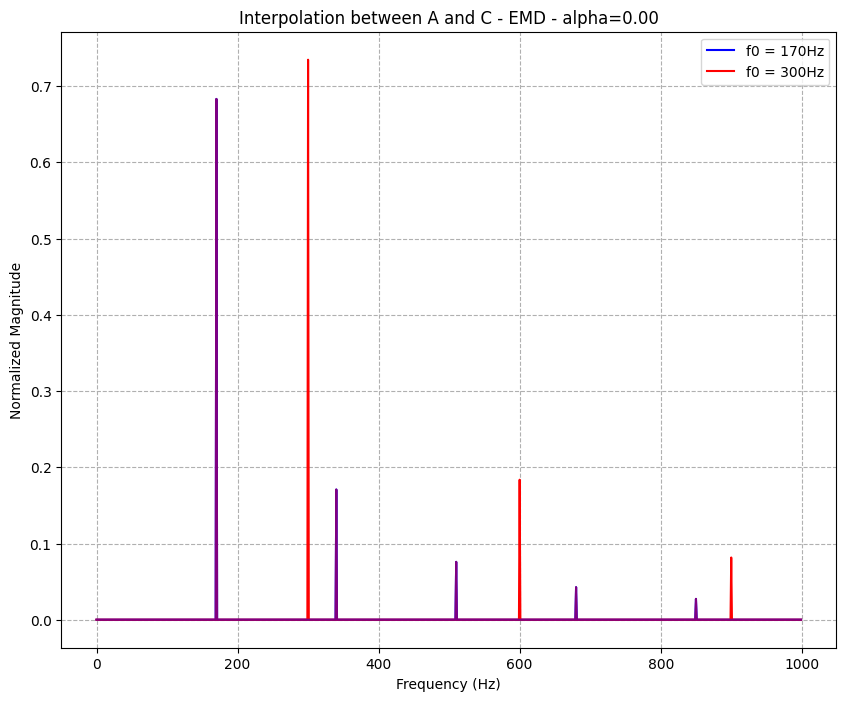

In [6]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two dirac distributions - EMD - alpha={alpha}')
ax.grid(True, which="both", ls="--")
ax.legend()

emd_line, = ax.plot([], [], label='ELD', color="purple")

def update(frame):
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    dirac_emd_interpolation = emd_optimal_transport(frequency, dirac_1, dirac_2, alpha=alpha)
    
    emd_line.set_data(frequency, dirac_emd_interpolation)
    
    ax.set_title(f'Interpolation between A and C - EMD - alpha={alpha:.2f}')
    
    return emd_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save('animations/diracs/emd_interpolation.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/backend.py:1143: RuntimeWarning: divide by zero encountered in log
  return np.log(a)
/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:1094: RuntimeWarning: invalid value encountered in divide
  v = b / (nx.dot(K.T, u))
/Users/davidvaldivia/IASD/memoire/audio_ot/audio_1D_transport/.venv/lib/python3.9/site-packages/ot/bregman/_sinkhorn.py:1139: UserWarning: Numerical errors at iteration 9
  warnings.warn('Numerical errors at iteration %d' % ii)


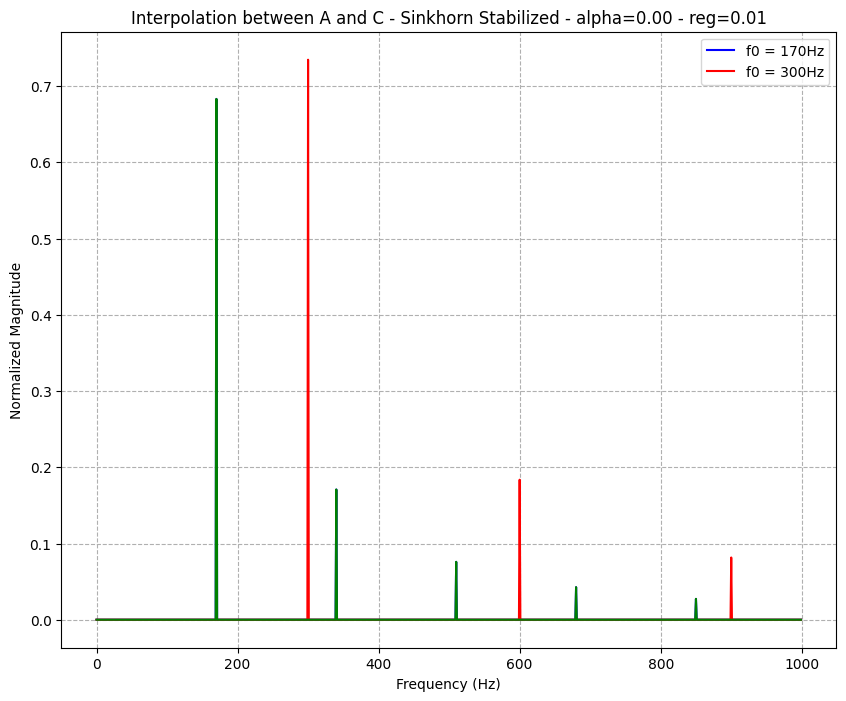

In [7]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10, 8])

ax.plot(frequency, dirac_1, label=f"f0 = {dirac_f1:.0f}Hz", color='blue', linewidth=1.5)
ax.plot(frequency, dirac_2, label=f"f0 = {dirac_f2:.0f}Hz", color='red', linewidth=1.5)
ax.set(xlabel='Frequency (Hz)', ylabel='Normalized Magnitude', title='Interpolation between two dirac distributions - Sinkhorn Stabilized - alpha={alpha}, reg={reg}')
ax.grid(True, which="both", ls="--")
ax.legend()

ss_line, = ax.plot([], [], label='Quantile', color="green")

def update(frame):
    alpha = frame / 40.0  # Assuming 40 frames to go from 0 to 1
    
    dirac_ss_interpolation = sinkhorn_stabilized_optimal_transport(dirac_1, dirac_2, alpha=alpha, reg=reg)
    
    ss_line.set_data(frequency, dirac_ss_interpolation)
    
    ax.set_title(f'Interpolation between A and C - Sinkhorn Stabilized - alpha={alpha:.2f} - reg={reg}')
    
    return ss_line,

# Create animation
ani = animation.FuncAnimation(fig=fig, func=update, frames=np.arange(0, 41), interval=100)

# Save the animation
ani.save(f'animations/diracs/ss_interpolation-reg={reg}.gif')